# Part I - (Ford GoBike System Data)
## by (John Kwame Dunyo)

## Introduction

#### Dataset Overview
The dataset used in this project is from the Ford GoBike Systems. It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

#### Investigation Overview
The Goal of this presentation is to explore the main features of the bike-sharing system of the greater San Francisco Bay area.  It seeks to try to answer the following questions:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. What does the distribution of trip duration look like?
4. Which days have the highest demand on trips?
5. Which hours during the day have the highest demand on trips?
6. How trip duration differs by user age, hour, day, and user type?
7. Does the above depend on if a user is a subscriber or customer?




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# global variables
weekdayOrder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tick_locs =  [1,5,10,15,30,60,90,180,360]
tick_names = ['1 min','5 min','10 min','15 min','30 min','1 hour','1.5 hours','3 hours','6 hours']

def label_plot(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show();

In [3]:
# # load in the dataset into a pandas dataframe, and print statistics
df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [4]:
# high-level overview of data shape, null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Preliminary Cleaning

### Challenges associated with the dataset

The following are some quality issues of the dataset that needs to be cleaned

* Missing values issues in the following columns; <code>start_station_id</code>, <code>start_station_name</code>, <code>end_station_id</code>, <code>end_station_name</code>, <code>member_birth_year</code>, <code>member_gender</code>.

* Data type issues;
 > 1. <code>start_time</code> and <code>end_time</code> need to be of type datetime not object.
 > 2. <code>start_station_id</code>, <code>end_station_id</code>, and <code>bike_id</code> should be of type string object
 > 3. <code>user_type</code>, <code>member_gender</code>, and <code>bike_share_for_all_trip</code> should be of type category
* Extract age from <code>member_gender</code> for easier analysis
* Add new columns for trip duration in minute, start_date, start hour of the day, start day of week and start month
 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### fixing the issues above

In [8]:
# drop all missing values 
df.dropna(inplace=True)

In [9]:
# convert start_time and end_time into datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert member_birth_year to type int
df.member_birth_year = df.member_birth_year.astype('int')

# changing dtype of id columns to type string object
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    df[col] = df[col].astype('str')
    
# change dtype of user_type, member_gender & bike_share... to type category
for col in ['user_type', 'member_gender', 'bike_share_for_all_trip']:
    df[col] = df[col].astype('category')

In [10]:
# add new column member_age for each member's age and assign type int
df['member_age'] = (2022-df['member_birth_year']).astype('int')

In [11]:
# add new columns for trip duration in minute, start_date, start hour of the day, start day of week and start month
df['duration_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

In [12]:
df.head

<bound method NDFrame.head of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
0                  21.0  Mon

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [14]:
# save cleaned data to a new csv file
df.to_csv('201902-fordgobike-tripdata_CLEANED.csv')

### What is the structure of your dataset?

> The data set originally had 183412 rows with 16 attributes. After preliminary cleaning, the final dataset now has 174953 rows and 22 features. 3 features are categorical, 2 are datetime and the rest numerical with 9 being object. 



### What is/are the main feature(s) of interest in your dataset?

> * duration_sec, number of trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* member_age
*member_gender
*bike_share_for_all_trip
*start_month
*start_dayofweek
*user_type

## Univariate Exploration

> In this section, we investigate distributions of individual variables. If
we see unusual points or outliers, take a deeper look to clean things up
and prepare ourself to look at relationships between variables.



### Which member gender has the highest ride distribution?

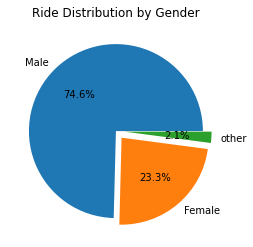

In [15]:
# plot a pie chart to visualize gender distribution
data = df['member_gender'].value_counts()

plt.pie(data, labels = ['Male','Female','other'], autopct='%1.1f%%', explode=[0,0.1,0.1]);
plt.title('Ride Distribution by Gender');

__Observation:__ Males (74.6%) frequent the Ford GoBike systems 3 times compared to their female counterparts

### Which age group has the highest ride distribution?

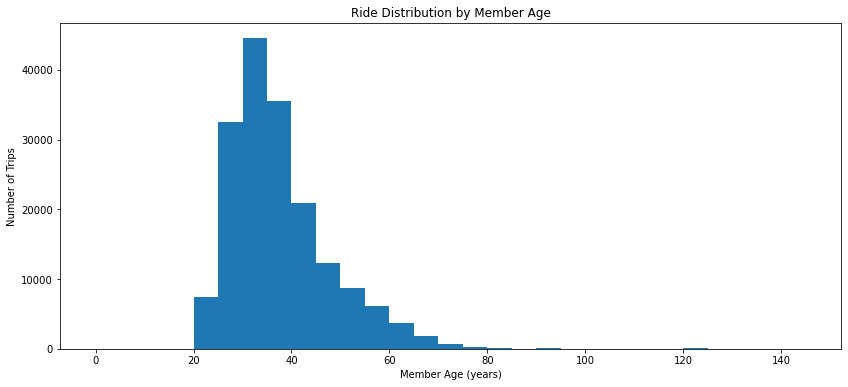

In [16]:
# plot a histogram chart to visualize age distribution
plt.figure(figsize=(14,6))
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(df['member_age'], bins = bins);
label_plot('Member Age (years)', 'Number of Trips', 'Ride Distribution by Member Age' )

__Observation:__ Most users of are between 25-45 years, with mean age around 35 years

### How does the distribution vary across user types? 

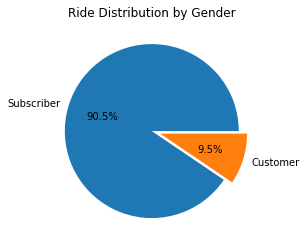

In [17]:
# plot a pie chart to visualize user type distribution
data = df['user_type'].value_counts()

plt.pie(data, labels = ['Subscriber','Customer'], autopct='%1.1f%%', explode=[0,0.1]);
plt.title('Ride Distribution by Gender');

__Observation:__ 90.5% of all users are subscribers with the remaining 9.5% beign customers

###  What is the daily usage distribution like?

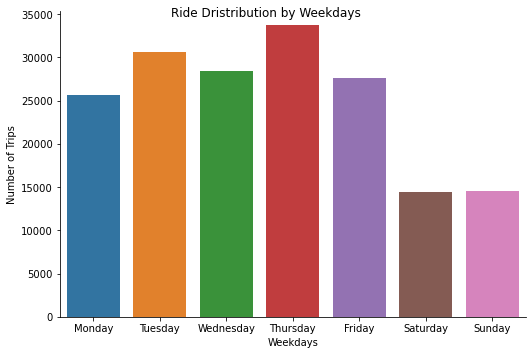

In [18]:
# plot a bar chart to visualize weekday ride distribution
graph = sb.catplot(data=df, x='start_dayofweek', kind='count', order=weekdayOrder, height=5, aspect = 1.5)
graph.set_axis_labels('Weekdays', 'Number of Trips')
graph.fig.suptitle('Ride Dristribution by Weekdays');

__Observation:__ The demand for trips gradually increases untill reaching its highest levels on Thursday, it then declines untill reaching its lowest levels on Saturday and Sunday. This suggests that most of the rides are used to transit to and from work/school.


### How does the distribution varry on hourly basis?

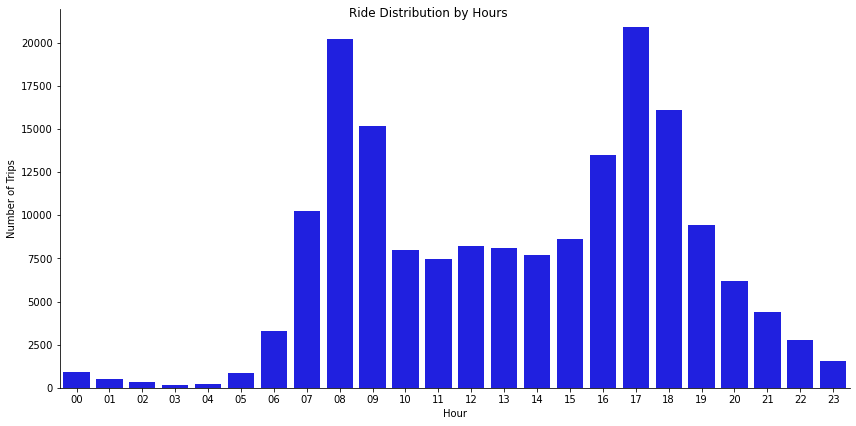

In [19]:
# plot a bar chart to visualize ride distribution by hours
hour_order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
hour_graph = sb.catplot(data=df, x='start_hourofday', kind='count', color='blue', order=hour_order, height=6, aspect=2)
hour_graph.set_axis_labels('Hour', 'Number of Trips')
hour_graph.fig.suptitle('Ride Distribution by Hours');


__Observation:__ The distribution is bimodal, with peaks at 8:00 am and 5:00pm. This further confirms that proposition  that most of the rides are used to transit to and from work/school.

### How does the distribution of trip duration look like?

<Figure size 1152x360 with 0 Axes>

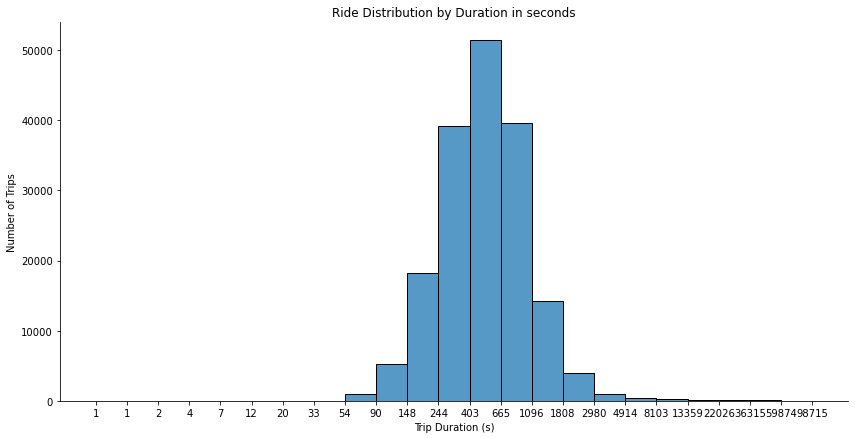

In [20]:
# plot a histogram chart to visualize ride distribution by duration in seconds
plt.figure(figsize=(16,5))
data = df['duration_sec'];
bin_edges = np.arange(0, np.log(data.max())+0.5, 0.5);
sb.displot(np.log(data), bins = bin_edges, height=6, aspect=2);
tick_locs = np.arange(0, np.log(data.max())+0.5, 0.5);
# print(tick_locs)
# print(np.exp(tick_locs).astype(int))
# tick_locs = [0, 60,300,600,900,1800]
tick_names=np.exp(tick_locs).astype(int);
plt.xticks(tick_locs, tick_names);
label_plot("Trip Duration (s)", 'Number of Trips', 'Ride Distribution by Duration in seconds')

__Observation__ Most of the rides range between 244 seconds (5 minutes) and 1096 seconds (15 minutes), with a mean of about 10 minutes. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ride duration exhibts a normal distribution with most of the rides having a duration between 5 and 15 minutes. Most of the rides take place during weekdays with a daily bimodal distribution with peaks at 8:00 AM and 5:00 PM, mosly on weekdays. This suggests the the rides are used mainly to go to and from work/school.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The other variables have a normal distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the relation between weekday and number of bike rides depending on user type?

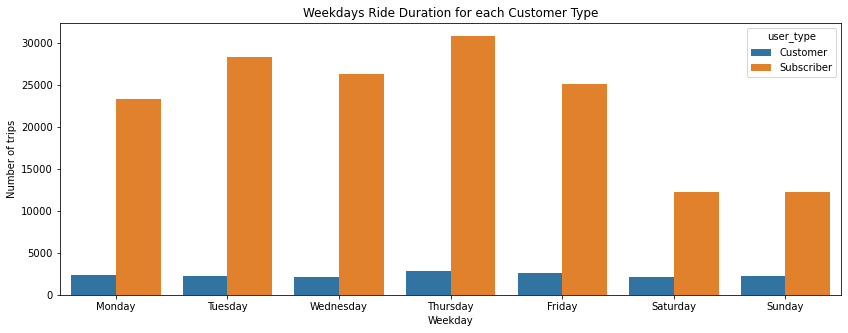

In [21]:
# plot a bar chart to visualize ride distribution of weekday by customer type
plt.figure(figsize=(14, 5))
ax = sb.countplot(data = df, x = 'start_dayofweek', hue = 'user_type', order= weekdayOrder)
label_plot('Weekday', 'Number of trips', 'Weekdays Ride Duration for each Customer Type')

__Observation:__ Subcribers have a relatively high usage of the bike share system with a sharp decrease on the weekends. Customers on the other hand exhibit an opposite relationship to that of subcribers

### How does ride duration vary accross the different member gender?

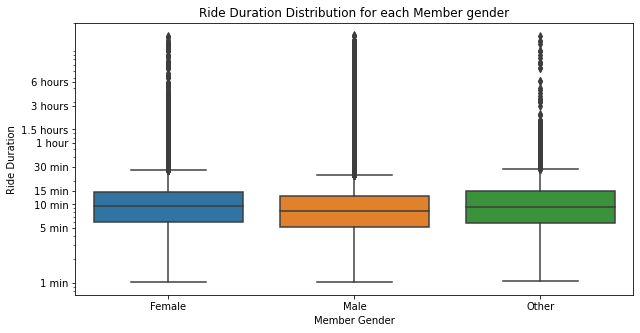

In [22]:
# plot a box chart to visualize ride distribution by duration
plt.figure(figsize=(10,5))
sb.boxplot(data = df, x = "member_gender", y = "duration_minute")
plt.yscale('log')
tick_locs = [1,5,10,15,30,60,90,180,360]
tick_names=['1 min','5 min','10 min','15 min','30 min','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names);
label_plot('Member Gender', 'Ride Duration', 'Ride Duration Distribution for each Member gender')


__Observation__ Females tend to have a slightly higher average time ride compared to male and the other gender

### What is the relationship between Ride duration and User type?

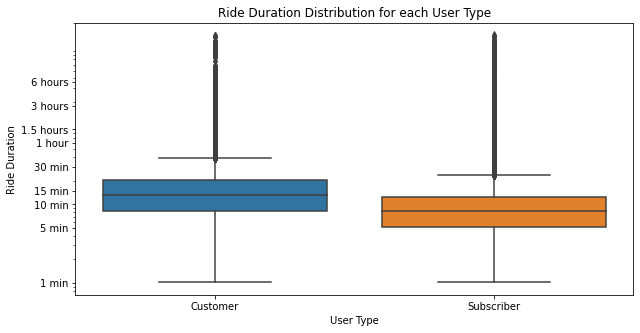

In [23]:
# plot a box chart to visualize ride distribution by duration
plt.figure(figsize=(10,5))
sb.boxplot(data = df, x = "user_type", y = "duration_minute")
plt.yscale('log')
tick_locs = [1,5,10,15,30,60,90,180,360]
tick_names=['1 min','5 min','10 min','15 min','30 min','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names);
label_plot('User Type', 'Ride Duration' , 'Ride Duration Distribution for each User Type')

__Observation__ From the box plot above, subscribers tend to have less average ride times ie (5 to 10 mins) compared to normal customers (10-15mins). 

### What is the relationship between Ride start hour and User type ?

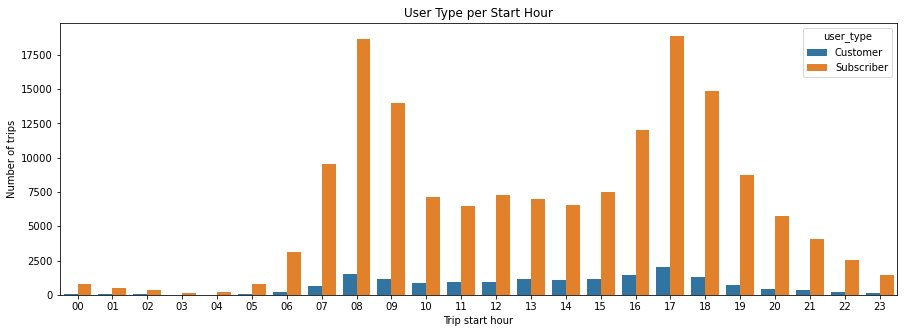

In [24]:
# plot a bar chart to visualize ride distribution for member type by trip start hour
plt.figure(figsize = (15, 5))
order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
sb.countplot(data = df, x = 'start_hourofday', hue = 'user_type', order=order)
label_plot('Trip start hour', 'Number of trips', 'User Type per Start Hour')

__Observation__ From the plot above, subcribers tend to have a general pattern with most rides starting at 08:00 and 17:00. This confirms the proposition that these rides for either work/school. Customers however do not have a pattern, thier rides are mostly during mid day.

### Average Trip Duration vs Day of the week

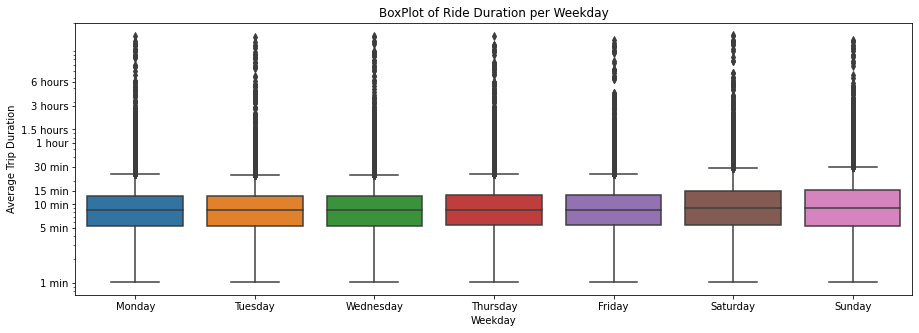

In [25]:
# plot a bar chart to visualize daily ride distribution
plt.figure(figsize=(15,5))

sb.boxplot(data = df, x = "start_dayofweek", y = "duration_minute", order=weekdayOrder)
plt.yscale('log')
plt.yticks(tick_locs, tick_names)
label_plot('Weekday', 'Average Trip Duration', 'BoxPlot of Ride Duration per Weekday' )

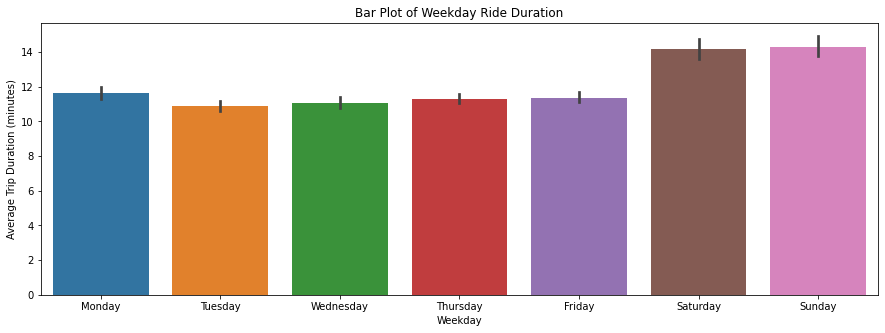

In [26]:
plt.figure(figsize=(15,5))
sb.barplot(data = df, x = "start_dayofweek", y = "duration_minute", order=weekdayOrder)
label_plot('Weekday', 'Average Trip Duration (minutes)', 'Bar Plot of Weekday Ride Duration')

__Observation:__ The box plot reflects a stable use along weekdays. Trip duration is longer during weekends, reflecting more casual usages.

### Ride distribution by Member Age for Each User Type

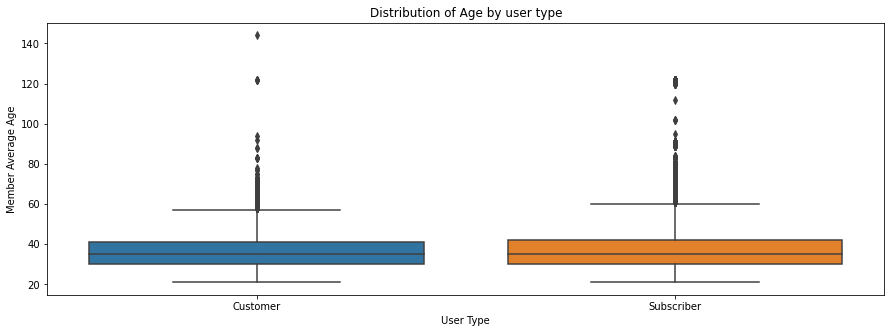

In [27]:
plt.figure(figsize=(15,5))

sb.boxplot(data=df, x = "user_type", y='member_age')
label_plot('User Type', 'Member Average Age', "Distribution of Age by user type")

__Observation:__ The box plot reflects customers are between 30 and 40 years  while subcribers are between 30 and 45 years

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. whereas customers, on the other hand, tend to ride for fun in the afternoon or early evenings over weekends, with higher average rides. This may be for recreational and entertainment purposes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, some of interesting how customers ride are mostly in the evenings

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Daily Trip Duration Distribution for each Member Gender

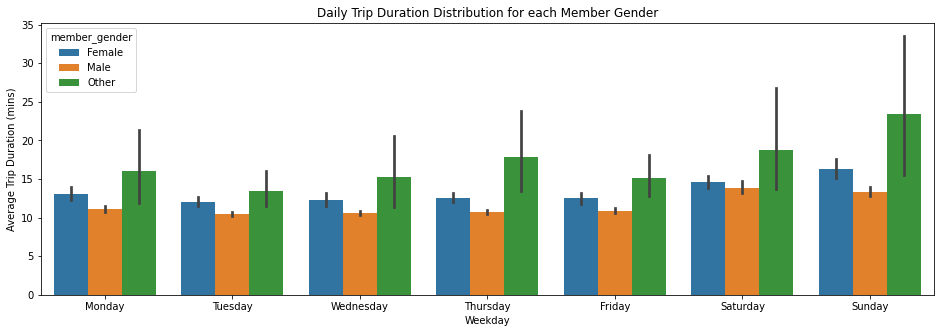

In [28]:
# plot a box chart to visualize daily ride distribution
plt.figure(figsize = (16,5));

sb.barplot(data = df, x = "start_dayofweek", y = "duration_minute", hue='member_gender', order=weekdayOrder)
label_plot('Weekday', 'Average Trip Duration (mins)', "Daily Trip Duration Distribution for each Member Gender")


__Observation:__ Females generally have higer trip durations than their male counterparts accross all days

### Daily Trip Duration Distribution for each User Type

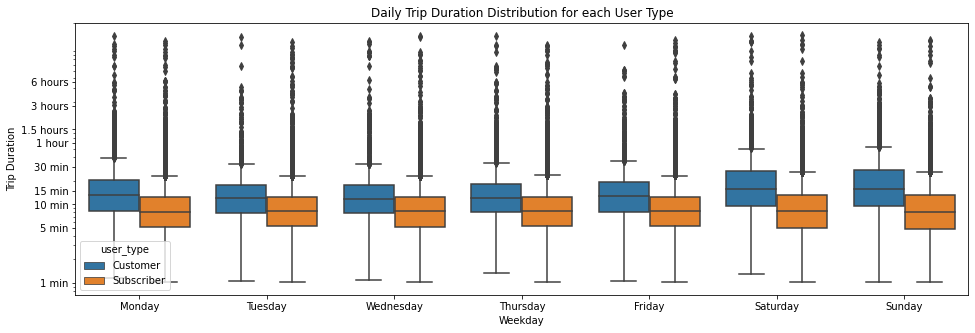

In [29]:
# plot a box chart to visualize daily ride distribution
plt.figure(figsize = (16,5));

sb.boxplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', order=weekdayOrder)
plt.yscale('log')
plt.yticks(tick_locs, tick_names)
label_plot('Weekday', 'Trip Duration', 'Daily Trip Duration Distribution for each User Type')

__Observation__: Trip duration is usually longer on weekends compared to weekdays

### Hourly Trip Duration Distribution for each User Type

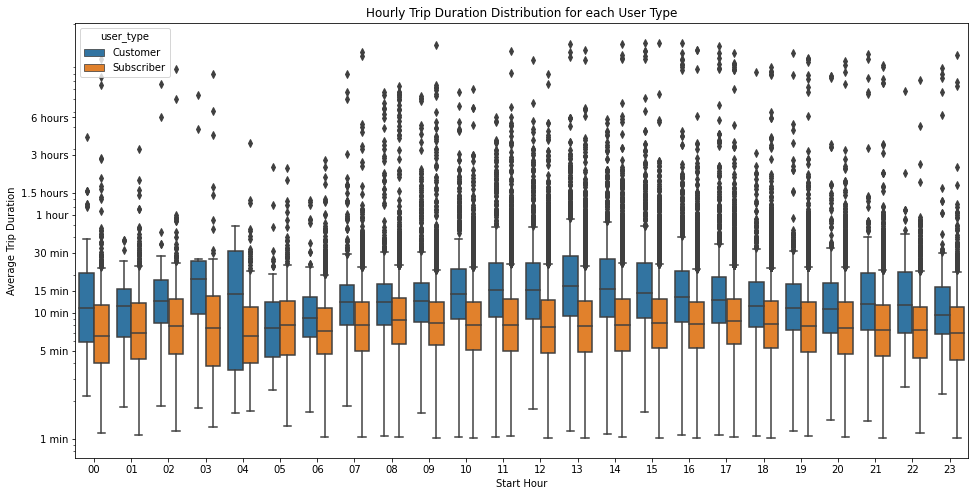

In [30]:
# plot a box chart to visualize daily ride distribution
plt.figure(figsize = (16,8));

order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
sb.boxplot(data = df, x = "start_hourofday", y = "duration_minute", hue='user_type', order=order)
plt.yscale('log')

plt.yticks(tick_locs, tick_names);
label_plot('Start Hour', 'Average Trip Duration', "Hourly Trip Duration Distribution for each User Type")


__Observation:__ Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers have consistently longer trips than subscribers, and this occurs across all hours of the day. However, most customer trips are much longer at midnight and midday.

### Were there any interesting or surprising interactions between features?

> None

## Conclusions
> There are two types of clients using the Ford GoBike system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work/school, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.
